In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

from gensim.parsing.preprocessing import preprocess_string, strip_tags
from gensim.parsing.preprocessing import strip_punctuation, strip_multiple_whitespaces
from gensim.parsing.preprocessing import stem_text, strip_numeric, strip_short
from gensim.corpora import Dictionary

# from yellowbrick.cluster import KElbowVisualizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [12]:
def clean_str(string):
    """Cleans and tokenizes a string with some functions from gensim.

    Input: A string
    Output: A lists of tokenized words"""
    return preprocess_string(string, filters=[strip_tags, strip_punctuation,
                                    strip_numeric, strip_multiple_whitespaces,
                                    strip_short])

def create_vocabulary(series_of_strings, min_count=20, max_percent=0.05, keep_n=10000):
    """Tokenizes words in the list_of_strings and filters extremes.
    Returns a set of words that comprise a vocabulary based on the
    input strings"""
    # all_words = series_of_strings.apply(lambda row: preprocess_string(row))
    all_words = Dictionary(series_of_strings.apply(lambda row: clean_str(row)))
    all_words.filter_extremes(no_below=min_count, no_above=max_percent, keep_n=keep_n)
    return set(all_words.values())

def tokenize(string):
    """Cleans and tokenizes a string and returns a list of strings that are in
    VOCABULARY"""
    words_in_string = clean_str(string)
    return [word for word in words_in_string if word in VOCABULARY]

In [21]:
from gensim.parsing.preprocessing import preprocess_string, strip_tags
from gensim.parsing.preprocessing import strip_punctuation, strip_multiple_whitespaces
from gensim.parsing.preprocessing import stem_text, strip_numeric, strip_short
from gensim.corpora import Dictionary

In [7]:
with open('/Users/scott/p4/pickles/vectorizer_tfidf_NMF_20.pkl', 'rb') as f:
    tf = pickle.load(f)

with open('/Users/scott/p4/pickles/doc_topic_tfidf_NMF_20.pkl', 'rb') as f:
    word_vec_reduced = pickle.load(f)

with open('/Users/scott/p4/pickles/model_tfidf_NMF_20.pkl', 'rb') as f:
    nmf = pickle.load(f)

In [13]:
with open('/Users/scott/p4/pickles/vocabulary.pkl', 'rb') as f:
    VOCABULARY = pickle.load(f)

In [18]:
docs = pd.read_csv('/Users/scott/p4/data/interim/fp_posts.csv')

In [19]:
wv = tf.fit_transform(docs.title)

In [20]:
print(type(wv))
wv[:10,:]

<class 'scipy.sparse.csr.csr_matrix'>


<10x150533 sparse matrix of type '<class 'numpy.float64'>'
	with 66 stored elements in Compressed Sparse Row format>

In [22]:
!pwd

/Users/scott/metis/projects/project4/models


In [23]:
print(type(nmf))
print(type(tf))
print(type(word_vec_reduced))

<class 'sklearn.decomposition.nmf.NMF'>
<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
<class 'numpy.ndarray'>


Complete for 1 clusters...
Complete for 2 clusters...
Complete for 3 clusters...
Complete for 4 clusters...
Complete for 5 clusters...
Complete for 6 clusters...
Complete for 7 clusters...
Complete for 8 clusters...
Complete for 9 clusters...


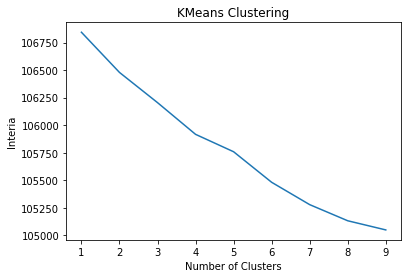

In [29]:
# nm = normalize(word_vec_reduced)
nm = normalize(wv)

nc = range(1,10)
errors = find_best_num_clusters(nm, nc)

e1 = [x[1] for x in errors]


plt.title('KMeans Clustering');
plt.xlabel('Number of Clusters');
plt.ylabel('Interia');
plt.plot(nc, e1);
plt.savefig('../images/Clustering_Undecomposed.png')

In [28]:
el

NameError: name 'el' is not defined

# word_vec_reduced.shape